In [1]:
import numpy as np
import pandas as pd

In [2]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


Following what the papers say as "statistically significant"

In [3]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [12]:
# to predict mortality, these columns are considered important
mortality_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'GradeofKidneyCategory',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'GENDER'
]

mortality_cares = cares[mortality_significant_columns + ['Mortality']]

In [31]:
mortality_cares = mortality_cares.dropna(how='any')

In [32]:
mortality_cares.shape

(76064, 15)

In [33]:
mortality_cares["Mortality"].isna().value_counts()

Mortality
False    76064
Name: count, dtype: int64

In [34]:
mortality_cares["Mortality"].value_counts()

Mortality
0    71083
1     4981
Name: count, dtype: int64

In [38]:
icu_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'GradeofKidneyCategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'PriorityCategory',
    'GENDER'
]
# same as mortality, but with surgical priority column (Priority Category)

icu_cares = cares[icu_significant_columns + ["ICUAdmgt24h"]]

In [39]:
icu_cares = icu_cares.dropna(how='any')

In [40]:
icu_cares["ICUAdmgt24h"].value_counts()

ICUAdmgt24h
0    75008
1     1056
Name: count, dtype: int64

Save as CSV

In [100]:
mortality_cares.to_csv("../data/CARES_mortality_dropna.csv", index=False)
icu_cares.to_csv("../data/CARES_ICU_dropna.csv", index=False)

# Simple Modeling

## Mortality

In [101]:
RANDOM_SEED = 3402

In [102]:
np.random.seed(RANDOM_SEED)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = mortality_cares.drop('Mortality', axis=1)
y = mortality_cares['Mortality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

Oversampling

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
smote = SMOTE()

x_res, y_res = smote.fit_resample(x_train, y_train)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [108]:
logreg_mort = LogisticRegression(random_state=RANDOM_SEED)
rf_mort = RandomForestClassifier(random_state=RANDOM_SEED)

In [156]:
logreg_mort.fit(x_train, y_train)

LogisticRegression(random_state=3402)

In [158]:
rf_mort.fit(x_train, y_train)

RandomForestClassifier(random_state=3402)

In [171]:
y_pred = logreg_mort.predict(x_test)
y_pred_proba = logreg_mort.predict_proba(x_test)

# y_pred = rf_mort.predict(x_test)
# y_pred_proba = rf_mort.predict_proba(x_test)

In [172]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.51      0.10      0.17      1494

    accuracy                           0.93     22820
   macro avg       0.72      0.55      0.57     22820
weighted avg       0.91      0.93      0.91     22820



In [174]:
f1_score(y_test, y_pred)

0.16759776536312848

In [175]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [176]:
auc(fpr, tpr)

0.856316525597843

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

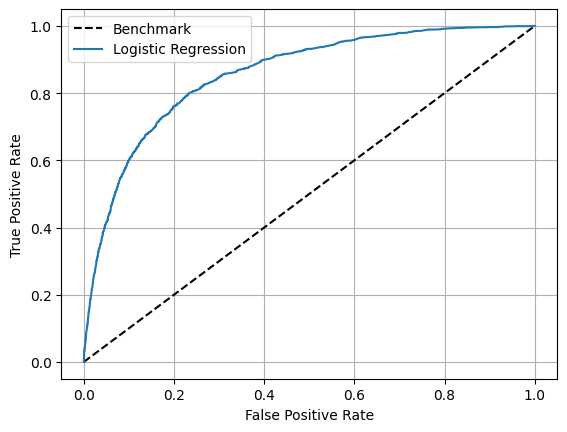

In [178]:
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

In [179]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

In [180]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [184]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [185]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [186]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - auc: 0.6401 - f1_score: 0.1228 - loss: 0.2679 - val_auc: 0.8480 - val_f1_score: 0.1229 - val_loss: 0.1860
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - auc: 0.8404 - f1_score: 0.1267 - loss: 0.1927 - val_auc: 0.8537 - val_f1_score: 0.1229 - val_loss: 0.1838
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - auc: 0.8465 - f1_score: 0.1233 - loss: 0.1873 - val_auc: 0.8562 - val_f1_score: 0.1229 - val_loss: 0.1830
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - auc: 0.8526 - f1_score: 0.1268 - loss: 0.1882 - val_auc: 0.8577 - val_f1_score: 0.1229 - val_loss: 0.1828
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - auc: 0.8569 - f1_score: 0.1248 - loss: 0.1841 - val_auc: 0.8565 - val_f1_score: 0.1229 - val_loss: 0.1851
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - auc: 0.8484 - f1_score: 0.1231 - loss: 0.1855 - val_auc: 0.8594 - val_f1_score: 0.1229 - val_loss: 0.1809
Epoch 7/10
1664/16

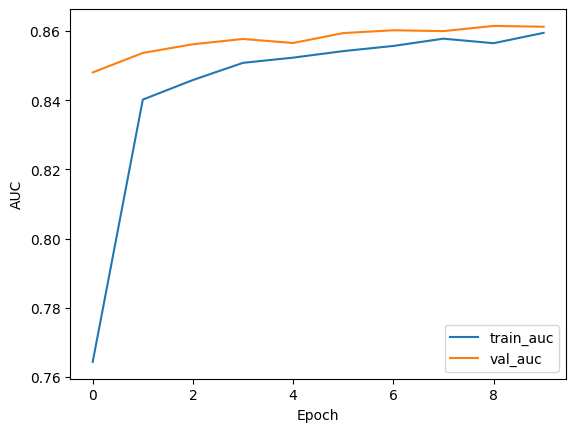

In [188]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [189]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step


In [190]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8614932548977365

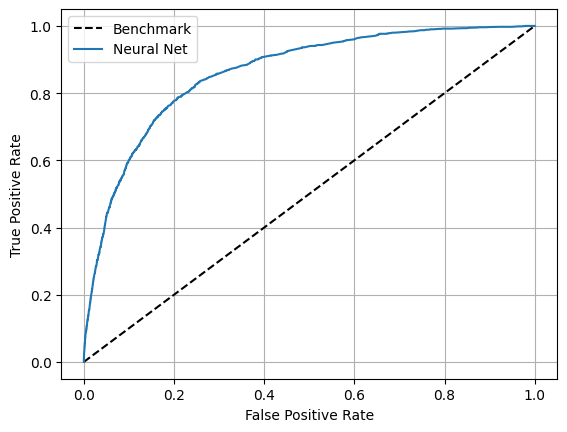

In [191]:
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")
plt.plot(fpr, tpr, label='Neural Net')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

## ICU

In [192]:
X = icu_cares.drop('ICUAdmgt24h', axis=1)
y = icu_cares['ICUAdmgt24h']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [193]:
x_res, y_res = smote.fit_resample(x_train, y_train)

In [194]:
x_res.shape

(105010, 15)

In [195]:
logreg_icu = LogisticRegression(random_state=RANDOM_SEED)

In [196]:
logreg_icu.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [197]:
y_pred = logreg_icu.predict(x_test)
y_pred_proba = logreg_icu.predict_proba(x_test)

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     22503
           1       0.06      0.78      0.11       317

    accuracy                           0.83     22820
   macro avg       0.53      0.80      0.51     22820
weighted avg       0.98      0.83      0.90     22820



In [199]:
f1_score(y_test, y_pred)

0.11299954065227377

In [200]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [201]:
auc(fpr, tpr)

0.8698077550403025

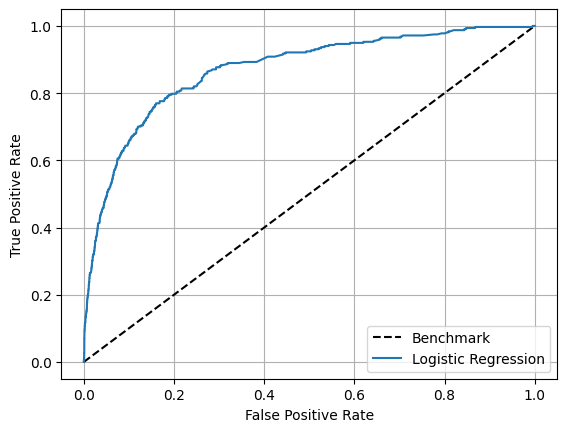

In [202]:
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()